<a href="https://colab.research.google.com/github/adil-ak/machine_learning/blob/main/18Dec_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df=pd.read_csv('daily_weather.csv')
df.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1


In [4]:
df.isnull().sum()

,0
air_pressure_9am,3
air_temp_9am,5
avg_wind_direction_9am,4
avg_wind_speed_9am,3
max_wind_direction_9am,3
max_wind_speed_9am,4
rain_accumulation_9am,6
rain_duration_9am,3
relative_humidity_9am,0
high_humidity_3pm,0


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

,0
air_pressure_9am,0
air_temp_9am,0
avg_wind_direction_9am,0
avg_wind_speed_9am,0
max_wind_direction_9am,0
max_wind_speed_9am,0
rain_accumulation_9am,0
rain_duration_9am,0
relative_humidity_9am,0
high_humidity_3pm,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1064 non-null   float64
 1   air_temp_9am            1064 non-null   float64
 2   avg_wind_direction_9am  1064 non-null   float64
 3   avg_wind_speed_9am      1064 non-null   float64
 4   max_wind_direction_9am  1064 non-null   float64
 5   max_wind_speed_9am      1064 non-null   float64
 6   rain_accumulation_9am   1064 non-null   float64
 7   rain_duration_9am       1064 non-null   float64
 8   relative_humidity_9am   1064 non-null   float64
 9   high_humidity_3pm       1064 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 91.4 KB


In [12]:
y=df['high_humidity_3pm']
x=df.drop('high_humidity_3pm',axis=1)

In [14]:
import sklearn
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.26535574,  0.87786259,  1.86340989, ..., -0.11867701,
        -0.17731379,  0.32916325],
       [-0.48952623,  0.57165247, -0.58410513, ..., -0.11867701,
        -0.17731379, -0.38464545],
       [ 1.3018918 , -0.39278817, -1.32104686, ..., -0.11867701,
        -0.16400162, -0.99339864],
       ...,
       [-0.72482991,  0.54407489,  0.67990892, ..., -0.11867701,
        -0.17731379,  0.45423846],
       [-1.98366327, -0.59273829,  0.43973636, ..., -0.11867701,
        -0.17731379,  1.21376461],
       [ 0.82668221,  1.13586274, -0.6540616 , ..., -0.11867701,
        -0.17731379, -0.77007823]])

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_leaf_nodes=10)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

In [21]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1])

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       107
           1       0.87      0.92      0.89       106

    accuracy                           0.89       213
   macro avg       0.89      0.89      0.89       213
weighted avg       0.89      0.89      0.89       213



In [31]:
x=pd.DataFrame(x)
x.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am
0,-0.158355,-0.366988,0.679909,-0.065329,0.701985,-0.235835,-0.118677,-0.177314,-0.825316
1,-1.653220,0.058712,0.344246,0.749037,0.499373,0.889007,-0.118677,-0.177314,0.329952
2,-0.904214,-0.225088,0.639398,0.161706,0.645373,-0.031682,-0.118677,-0.177314,-0.087886
3,-0.954567,1.032663,1.189191,-0.731629,1.002923,-0.732207,-0.118677,-0.177314,0.183176
4,1.560129,-0.604652,-1.288028,1.899622,-1.170282,2.038550,-0.118677,-0.177314,-0.582572


In [32]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

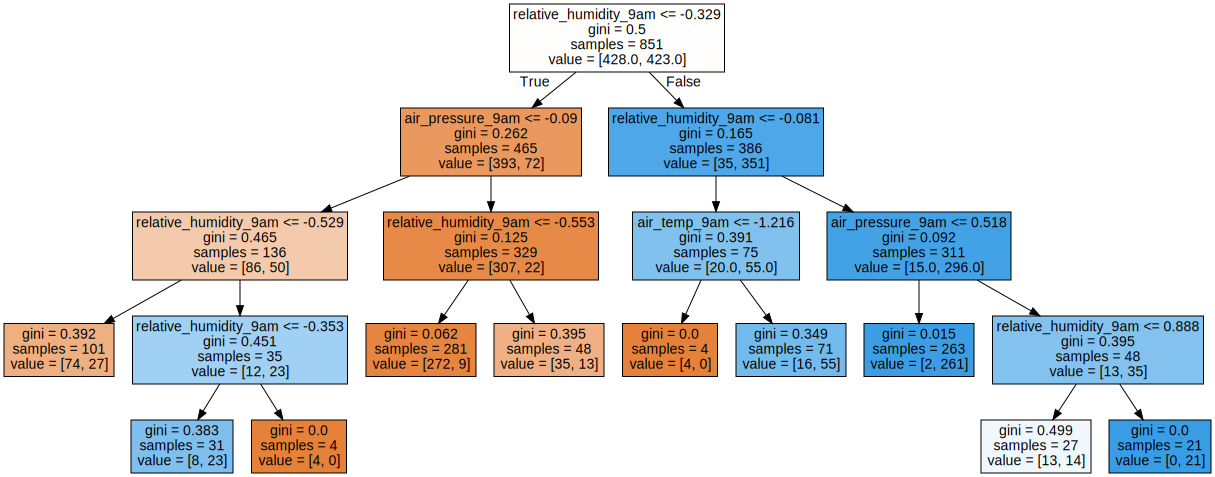

In [33]:
graph=Source(tree.export_graphviz(model,feature_names=x.columns,filled=True))
display(SVG(graph.pipe(format='svg')))